# PHYS 295 Lab 4 (Part A) Code
I will use this code to get the linear graph needed for the Lab 4a assignment.

In [142]:
#Lab 4 - 
from matplotlib import pyplot as plt 
from scipy import stats
import numpy as np  
import pandas as pd
import csv

def load_data(filename, col1, col2):
    time_1 = []
    time_2 = []
    with open(filename) as numbers:
        numbers_data = csv.reader(numbers, delimiter=",")
        next(numbers_data) #skip the header
        for row in numbers_data:
            if row[col1] == '':
                pass
            else:
                time_1.append(float(row[col1])); time_2.append(float(row[col2]))
        return time_1,time_2

def inverse_time(data):
    inverse = []
    for time in data:
        value = 1/time; inverse.append(float(value))
    return inverse

def log_time(data):
    log = []
    for time in data:
        value = np.log(time); log.append(float(value))
    return log

data_att_1 = load_data("PHYS 295 Lab 4a (Ionizing Radiation).csv", 0, 1)
print(data_att_1)
y_axis_inv = inverse_time(data_att_1[1]); y_axis_log = log_time(y_axis_inv)

([30.86, 51.39, 78.25, 108.01, 147.6, 208.32, 336.47], [4.55, 5.76, 7.56, 11.64, 19.39, 37.75, 106.42])


## Inverse of the Time Graph/Radioactive Decay Curve(Attempt 1)

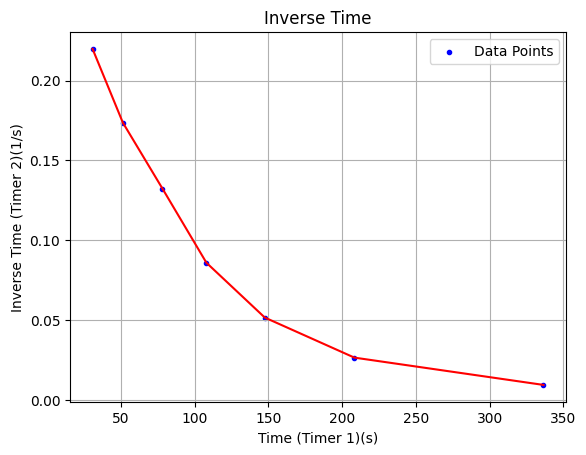

In [143]:
# Creates the inverse time plot for the first attempt data set
plt.figure()
plt.scatter(data_att_1[0], y_axis_inv, marker=".", color="blue") #add points to plot
plt.plot(data_att_1[0], y_axis_inv, color="red") #add points to plot

#model = np.poly1d(np.polyfit(data_att_1[0], y_axis_inv, 2))
#polyline = np.linspace(0, 350)
#plt.plot(polyline, model(polyline))
x_val = np.array(data_att_1[0])
plt.legend(['Data Points'], loc="upper right")
plt.grid()
plt.title("Inverse Time") 
plt.xlabel('Time (Timer 1)(s)')
plt.ylabel('Inverse Time (Timer 2)(1/s)')
plt.show()

[0.9999999999999999, 0.7899305555555555, 0.601851851851852, 0.390893470790378, 0.2346570397111913, 0.1205298013245033, 0.042755121217816196]


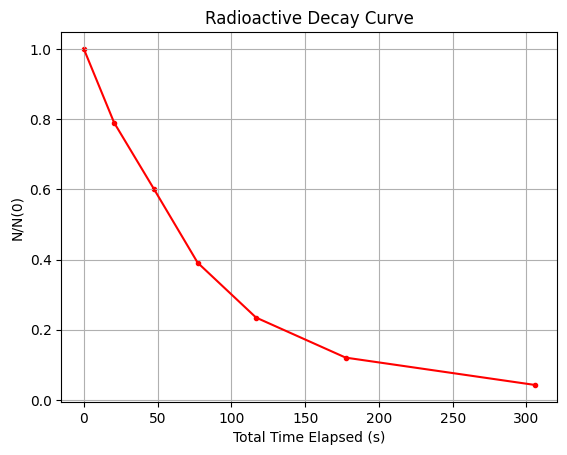

In [144]:
new = []
for data in y_axis_inv:
    value = data*4.55
    new.append(value)

new_x = []
for data in data_att_1[0]:
    value = data - 30.86
    new_x.append(value)
#new.reverse()
print(new)
plt.figure()
plt.scatter(new_x, new, marker=".", color="red") #add points to plot
plt.plot(new_x, new, color="red") #add points to plot

#model = np.poly1d(np.polyfit(new_x, new, 2))
#polyline = np.linspace(0, 325)
#plt.plot(polyline, model(polyline))
x_val = np.array(new)
#plt.legend(['Data Points'], loc="upper right")
plt.grid()
plt.title("Radioactive Decay Curve") 
plt.xlabel('Total Time Elapsed (s)')
plt.ylabel('N/N(0)')
plt.show()

## Log of the Inverse Time Graph (Attempt 1)

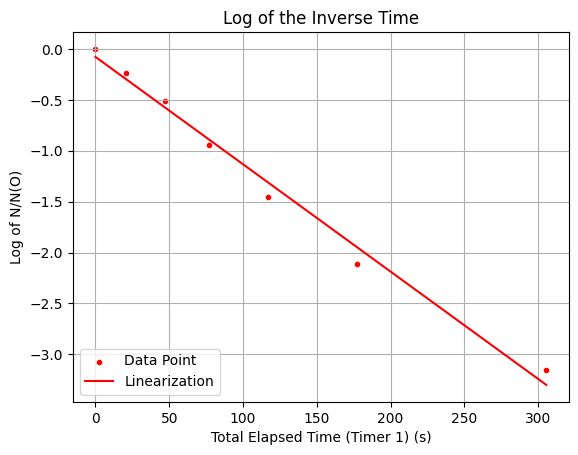

In [119]:
log = log_time(new)
plt.figure()
plt.scatter(new_x, log, marker=".", color="red") #add points to plot
x_val = np.array(new_x)
x_ax, y_ax = np.polyfit(new_x, log, 1)
plt.plot(x_val, x_ax*x_val+y_ax, color="red") #add line of best fit to plot
plt.legend(['Data Point', 'Linearization'], loc="lower left")
plt.grid()
plt.title("Log of the Inverse Time") 
plt.xlabel('Total Elapsed Time (Timer 1) (s)')
plt.ylabel('Log of N/N(O)')
plt.show()

In [113]:
statnull = stats.linregress(new_x, log)
print(statnull)

LinregressResult(slope=np.float64(-0.010542019139024753), intercept=np.float64(-0.07829856675234814), rvalue=np.float64(-0.994332479926491), pvalue=np.float64(4.630380050406593e-06), stderr=np.float64(0.0005040835056467211), intercept_stderr=np.float64(0.07308271308830169))


In [127]:
half_life = (np.log(2))/(-statnull[0])
print(f"The slope of the graph and the k constant value is equal to {-statnull[0]}")
print("The theoretical value of half-life of radon-220 decay is 55.6 seconds")
print(f"The experimental value of half-life of radon-220 decay is {half_life} seconds")

The slope of the graph and the k constant value is equal to 0.010542019139024753
The theoretical value of half-life of radon-220 decay is 55.6 seconds
The experimental value of half-life of radon-220 decay is 65.75089377271503 seconds


## Log of the Inverse Time Graph (Attempt 2)

In [39]:
data_att_2 = load_data("PHYS 295 Lab 4a (Ionizing Radiation).csv", 2, 3)
print(data_att_2)
y_axis_inv = inverse_time(data_att_2[1]); y_axis_log = log_time(y_axis_inv)

([24.77, 46.39, 78.3, 124.71, 213.05], [10.74, 15.12, 25.51, 39.72, 78.61])


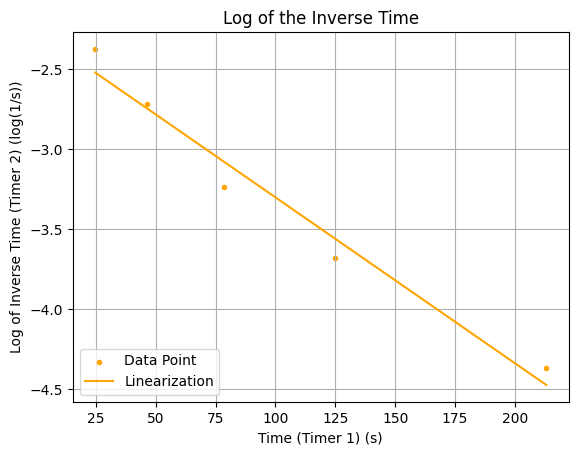

In [40]:
plt.figure()
plt.scatter(data_att_2[0], y_axis_log, marker=".", color="orange") #add points to plot
x_val = np.array(data_att_2[0])
x_ax, y_ax = np.polyfit(data_att_2[0], y_axis_log, 1)
plt.plot(x_val, x_ax*x_val+y_ax, color="orange") #add line of best fit to plot
plt.legend(['Data Point', 'Linearization'], loc="lower left")
plt.grid()
plt.title("Log of the Inverse Time") 
plt.xlabel('Time (Timer 1) (s)')
plt.ylabel('Log of Inverse Time (Timer 2) (log(1/s))')
plt.show()

In [41]:
stat2 = stats.linregress(x_val, y_axis_log)
print(stat2)

LinregressResult(slope=np.float64(-0.010363378502044973), intercept=np.float64(-2.2652344950404224), rvalue=np.float64(-0.9844663393235488), pvalue=np.float64(0.002318622570652423), stderr=np.float64(0.0010670840705856435), intercept_stderr=np.float64(0.12611413488322942))


In [129]:
half_life = (np.log(2))/(-stat2[0])
print(f"The slope of the graph and the k constant value is equal to {-stat2[0]}")
print("The theoretical value of half-life of radon-220 decay is 55.6 seconds")
print(f"The experimental value of half-life of radon-220 decay is {half_life} seconds")

The slope of the graph and the k constant value is equal to 0.010363378502044973
The theoretical value of half-life of radon-220 decay is 55.6 seconds
The experimental value of half-life of radon-220 decay is 66.88428685907485 seconds


## Log of the Inverse Time Graph (Attempt 3)

In [131]:
data_att_3 = load_data("PHYS 295 Lab 4a (Ionizing Radiation).csv", 4, 5)
print(data_att_3)
y_axis_inv = inverse_time(data_att_3[1]); y_axis_log = log_time(y_axis_inv)

([14.72, 31.23, 47.91, 69.58, 100.93, 141.16, 199.71, 346.01], [2.65, 5.12, 6.41, 7.3, 9.74, 19.94, 38.88, 125.95])


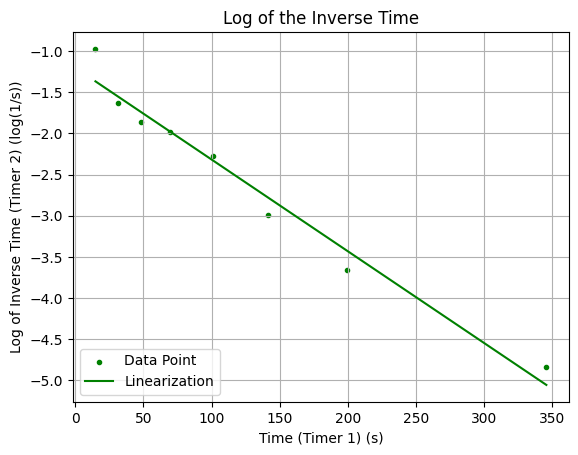

In [44]:
plt.figure()
plt.scatter(data_att_3[0], y_axis_log, marker=".", color="green") #add points to plot
x_val = np.array(data_att_3[0])
x_ax, y_ax = np.polyfit(data_att_3[0], y_axis_log, 1)
plt.plot(x_val, x_ax*x_val+y_ax, color="green") #add line of best fit to plot
plt.legend(['Data Point', 'Linearization'], loc="lower left")
plt.grid()
plt.title("Log of the Inverse Time") 
plt.xlabel('Time (Timer 1) (s)')
plt.ylabel('Log of Inverse Time (Timer 2) (log(1/s))')
plt.show()

In [ ]:
Radioactive D

[1.0, 0.517578125, 0.41341653666146644, 0.36301369863013694, 0.2720739219712525, 0.13289869608826477, 0.06815843621399176, 0.021040095275903135]


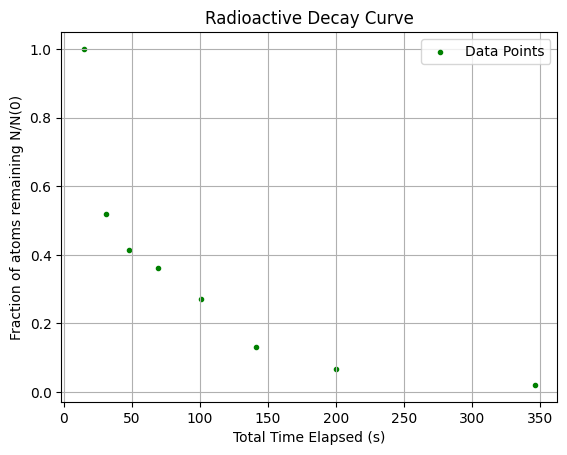

In [139]:
new = []
for data in y_axis_inv:
    value = data*2.65
    new.append(value)

new_x = []
for data in data_att_3[0]:
    value = data
    new_x.append(value)
#new.reverse()
print(new)
plt.figure()
plt.scatter(new_x, new, marker=".", color="green") #add points to plot
#plt.plot(new_x, new, color="red") #add points to plot

#model = np.poly1d(np.polyfit(new_x, new, 2))
#polyline = np.linspace(0, 325)
#plt.plot(polyline, model(polyline))
x_val = np.array(new)
plt.legend(['Data Points'], loc="upper right")
plt.grid()
plt.title("Radioactive Decay Curve") 
plt.xlabel('Total Time Elapsed (s)')
plt.ylabel('Fraction of atoms remaining N/N(0)')
plt.show()

In [45]:
stat3 = stats.linregress(x_val, y_axis_log)
print(stat3)

LinregressResult(slope=np.float64(-0.011125952267948793), intercept=np.float64(-1.2044024334786472), rvalue=np.float64(-0.9847309732457037), pvalue=np.float64(8.798067776544154e-06), stderr=np.float64(0.0008029721278814554), intercept_stderr=np.float64(0.12634019141467695))


In [128]:
half_life = (np.log(2))/(-stat3[0])
print(f"The slope of the graph and the k constant value is equal to {-stat3[0]}")
print("The theoretical value of half-life of radon-220 decay is 55.6 seconds")
print(f"The experimental value of half-life of radon-220 decay is {half_life} seconds")

The slope of the graph and the k constant value is equal to 0.011125952267948793
The theoretical value of half-life of radon-220 decay is 55.6 seconds
The experimental value of half-life of radon-220 decay is 62.3000318414754 seconds
